<a href="https://colab.research.google.com/github/AHartNtkn/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS7_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
!wget https://raw.githubusercontent.com/AHartNtkn/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv

--2019-08-07 18:08:55--  https://raw.githubusercontent.com/AHartNtkn/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17574 (17K) [text/plain]
Saving to: ‘persons.csv’

persons.csv         100%[===================>]  17.16K  --.-KB/s    in 0.01s   

2019-08-07 18:08:56 (1.41 MB/s) - ‘persons.csv’ saved [17574/17574]



In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
?pd.read_csv

In [0]:
df = pd.read_csv('persons.csv');

# The unnamed axis is redundant, so I will remove it.
df = df.drop('Unnamed: 0', axis=1)

df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


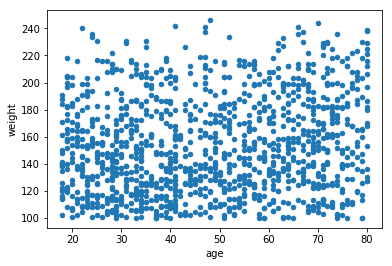

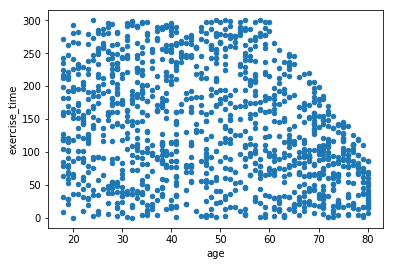

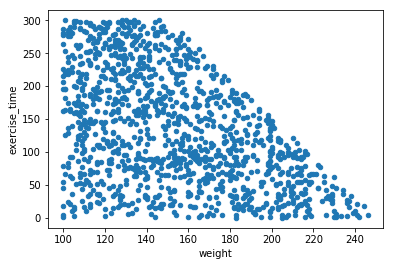

In [0]:
# These suggest randomly generated data with artificial cut-offs for exersise time vs age and exersise time vs weight.
df.plot.scatter('age', 'weight')
df.plot.scatter('age', 'exercise_time')
df.plot.scatter('weight', 'exercise_time');

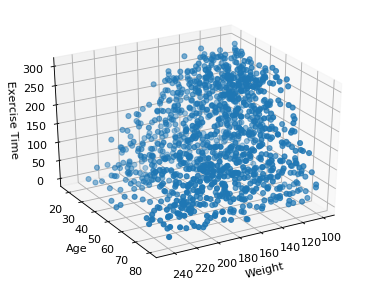

In [0]:
# Make a 3D scatterplot.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 15), dpi=80)

ax = fig.add_subplot(3, 3, i+1, projection='3d')
ax.scatter(df.weight, df.age, df.exercise_time)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Exercise Time')

ax.view_init(30, 60)

plt.show()

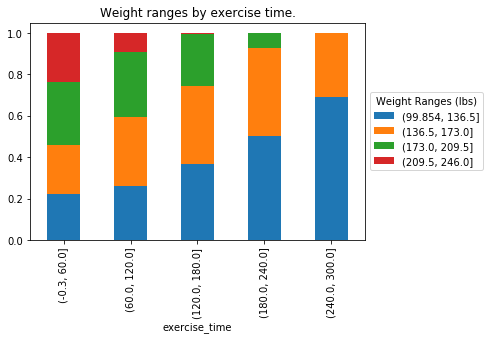

In [108]:
# Place weight and exercise into bins
weight_bins = pd.cut(df['weight'], 4)
exercise_bins = pd.cut(df['exercise_time'], 5)

# Plot weight vs exercise time
f = plt.figure()
plt.title("Weight ranges by exercise time.")
pd.crosstab(exercise_bins, weight_bins, normalize='index').plot(kind='bar', ax=f.gca(), stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Weight Ranges (lbs)')
plt.show()

In [0]:
df.drop('age', axis=1).corr()

,weight,exercise_time
weight,1.000000,-0.478021
exercise_time,-0.478021,1.000000


As this graph shows, there's a stark decline in weight as exercise time increases.

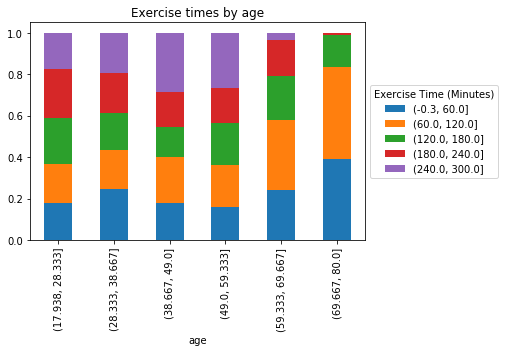

In [107]:
# Put ages into bins
age_bins = pd.cut(df['age'], 6)

# Plot age vs exercise time
f = plt.figure()
plt.title("Exercise times by age")
pd.crosstab(age_bins, exercise_bins, normalize='index').plot(kind='bar', ax=f.gca(), stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Exercise Time (Minutes)')
plt.show()

In [0]:
df.drop('weight', axis=1).corr()

,age,exercise_time
age,1.000000,-0.273818
exercise_time,-0.273818,1.000000


As a person ages, the amount of time they spend exercising tends to decrease.

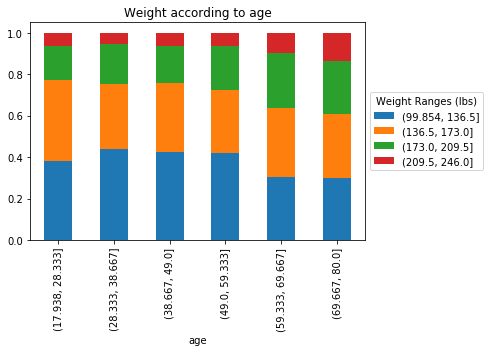

In [106]:
# Plot age vs weight
f = plt.figure()
plt.title("Weight according to age")
pd.crosstab(age_bins, weight_bins, normalize='index').plot(kind='bar', ax=f.gca(), stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Weight Ranges (lbs)')
plt.show()

In [0]:
df.drop('exercise_time', axis=1).corr()

,age,weight
age,1.000000,0.144168
weight,0.144168,1.000000


Though the trend is only slight, as a person ages, they do tend to a higher weight. We can try controlling for these things. By looking at the data, it seems that the correlations should disappear if we select individuals with an exercise time < 100, since that's where the cutoff for affecting age starts.

In [0]:
df.query('exercise_time<100').drop('exercise_time', axis=1).corr()

,age,weight
age,1.000000,0.001725
weight,0.001725,1.000000


And, indeed, it basically does.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. All of them are continous by default. I changed them to ordinal data using bins.
2. Weight is inversly correlated with exercise time, age is inversly correlated with exercise time, and weight is slightly correlated with age.
3. Of the three, only the correlation between age and weight is spurious. Less exercise tends toward more weight, and more age tends toward less exercise, so more age tends toward more weight as a result.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)